In [ ]:
import pandas as pd
import logging

In [ ]:
logging.basicConfig(level= logging.INFO, filename= "logs.log", filemode="w", format="%(asctime)s - %(levelname)s - %(message)s ")

In [ ]:
try:
  1/0
except Exception as e:
  logging.exception(e)


ERROR:root:division by zero
Traceback (most recent call last):
  File "<ipython-input-3-cd4e0953fa27>", line 2, in <cell line: 1>
    1/0
ZeroDivisionError: division by zero


In [ ]:
logging.exception("exception occured")

ERROR:root:exception occured
NoneType: None


In [ ]:
df = pd.read_csv("Updated_sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#check for duplicates

In [ ]:
df.isna().sum()

Order ID            87
Product             87
Quantity Ordered    87
Price Each          87
Order Date          87
Purchase Address    87
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
#remove incorrect data
df = df[df['Order ID'] != 'Order ID']

In [ ]:
data_types = {'Order ID': int, 'Product': str, 'Quantity Ordered': int, 'Price Each': float,  'Order Date': 'datetime64', 'Purchase Address':str}
df = df.astype(data_types)

In [ ]:
df.convert_dtypes().dtypes

Order ID                     Int64
Product                     string
Quantity Ordered             Int64
Price Each                 Float64
Order Date          datetime64[ns]
Purchase Address            string
dtype: object

#anomaly detection

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,30246.000000,30246.000000,30246.000000
mean,207898.522978,1.124446,185.259397
std,28266.667480,0.441656,331.459098
min,176558.000000,1.000000,2.990000
25%,183805.250000,1.000000,11.950000
50%,191058.500000,1.000000,14.950000
75%,240906.750000,1.000000,150.000000
max,248150.000000,8.000000,1700.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x78ce4e804f10>,
 'caps': [<matplotlib.lines.Line2D at 0x78ce4e805450>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ce4e804ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x78ce4e805990>],
 'fliers': [<matplotlib.lines.Line2D at 0x78ce4e805c30>],
 'means': []}

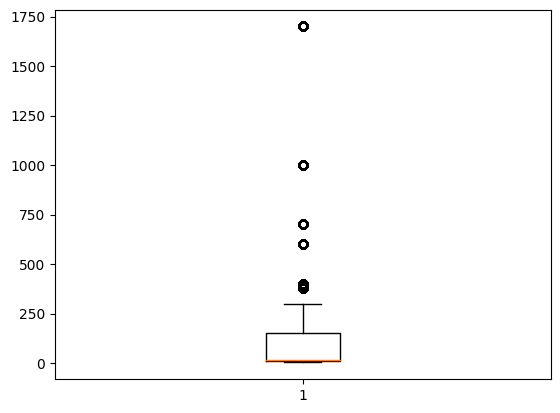

In [ ]:
plt.boxplot(df["Price Each"])

{'whiskers': [<matplotlib.lines.Line2D at 0x78ce4e86d0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x78ce4e86d630>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ce4e86ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x78ce4e86db70>],
 'fliers': [<matplotlib.lines.Line2D at 0x78ce4e86de10>],
 'means': []}

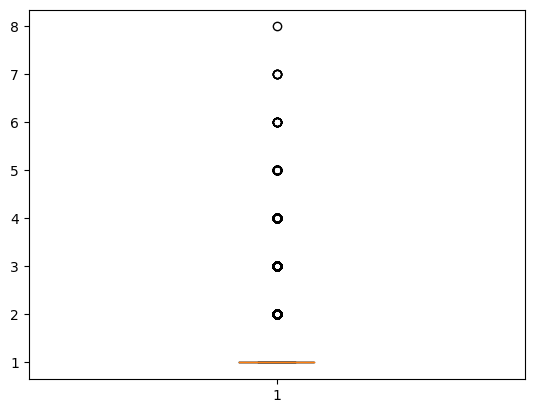

In [ ]:
plt.boxplot(df["Quantity Ordered"])

#transform

In [ ]:
#calc total sales
df["total_sales"] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
# calc order month and year
df['Order_Month'] = df['Order Date'].dt.month


In [ ]:
all_months = pd.DataFrame({'Order_Month': range(1, 13)})
df = pd.merge(all_months, df, on='Order_Month', how='left')
df.fillna(0, inplace=True)

df.head()

,Order_Month,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sales
0,1,0.0,0,0.0,0.00,0,0,0.00
1,2,0.0,0,0.0,0.00,0,0,0.00
2,3,0.0,0,0.0,0.00,0,0,0.00
3,4,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
4,4,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99


In [ ]:
df['Order_Month'] = df['Order_Month'].apply(lambda x: 'month_' + str(x))


In [ ]:
df = df.groupby(['Product', 'Order_Month'])['total_sales'].sum().reset_index()

df

,Product,Order_Month,total_sales
0,0,month_1,0.00
1,0,month_10,0.00
2,0,month_11,0.00
3,0,month_12,0.00
4,0,month_2,0.00
...,...,...,...
62,Wired Headphones,month_5,23.98
63,Wired Headphones,month_8,15467.10
64,iPhone,month_4,485100.00
65,iPhone,month_5,1400.00


In [ ]:
df2 =df.pivot_table(index=['Product'], columns='Order_Month', values='total_sales', fill_value=0).reset_index()

df2.head()

Order_Month,Product,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,0,0,0,0,0,0,0.00,0.00,0,0,0.00,0.00
1,20in Monitor,0,0,0,0,0,0,43226.07,219.98,0,0,28707.39,109.99
2,27in 4K Gaming Monitor,0,0,0,0,0,0,220344.35,0.00,0,0,171205.61,0.00
3,27in FHD Monitor,0,0,0,0,0,0,110242.65,299.98,0,0,73645.09,149.99
4,34in Ultrawide Monitor,0,0,0,0,0,0,247753.48,379.99,0,0,144396.20,379.99


In [ ]:
df2 = df2.iloc[1:,:].reset_index(drop=True)

#Load

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("sales.db")

In [ ]:
# Insert the data into the SQLite table
df.to_sql('Orders', conn, if_exists='replace', index=False)
df2.to_sql('Product_by_sales', conn, if_exists='replace', index=False)

19

#SQL Queries

In [ ]:
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(Product_by_sales)")

# Fetch the results and print column names
column_names = [row[1] for row in cursor.fetchall()]
print(column_names)


['Product', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9']


In [ ]:
cursor = conn.execute('''
SELECT Product,
       SUM(month_10 + month_11 + month_12) AS total_sales_last_3_months
FROM Product_by_sales
GROUP BY Product
                        ''')

In [ ]:
result = cursor.fetchall()
for row in result:
    print(row)

('20in Monitor', 0)
('27in 4K Gaming Monitor', 0)
('27in FHD Monitor', 0)
('34in Ultrawide Monitor', 0)
('AA Batteries (4-pack)', 0)
('AAA Batteries (4-pack)', 0)
('Apple Airpods Headphones', 0)
('Bose SoundSport Headphones', 0)
('Flatscreen TV', 0)
('Google Phone', 0)
('LG Dryer', 0)
('LG Washing Machine', 0)
('Lightning Charging Cable', 0)
('Macbook Pro Laptop', 0)
('ThinkPad Laptop', 0)
('USB-C Charging Cable', 0)
('Vareebadd Phone', 0)
('Wired Headphones', 0)
('iPhone', 0)


In [ ]:
#second query
cursor = conn.execute('''SELECT
                            product,
                            COALESCE(SUM(month_1), 0) +
                            COALESCE(SUM(month_2), 0) +
                            COALESCE(SUM(month_3), 0) +
                            COALESCE(SUM(month_4), 0) +
                            COALESCE(SUM(month_5), 0) +
                            COALESCE(SUM(month_6), 0) +
                            COALESCE(SUM(month_7), 0) +
                            COALESCE(SUM(month_8), 0) +
                            COALESCE(SUM(month_9), 0) +
                            COALESCE(SUM(month_10), 0) +
                            COALESCE(SUM(month_11), 0) +
                            COALESCE(SUM(month_12), 0) AS total_sales_amount
                        FROM
                            Product_by_sales
                        GROUP BY
                            Product
                        ORDER BY
                            total_sales_amount DESC
                        LIMIT 5;
                        ''')

In [ ]:
result = cursor.fetchall()
for row in result:
    print(row)

('Macbook Pro Laptop', 1281800.0)
('iPhone', 793100.0)
('ThinkPad Laptop', 666993.33)
('Google Phone', 564600.0)
('34in Ultrawide Monitor', 392909.66000000003)


In [ ]:
#third query
cursor = conn.execute('''SELECT Product,
       AVG(month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12) AS monthly_avg_sales
FROM Product_by_sales
GROUP BY Product
                        ''')

In [ ]:
result = cursor.fetchall()
for row in result:
    print(row)

('20in Monitor', 72263.43000000001)
('27in 4K Gaming Monitor', 391549.96)
('27in FHD Monitor', 184337.71000000002)
('34in Ultrawide Monitor', 392909.66000000003)
('AA Batteries (4-pack)', 17848.32)
('AAA Batteries (4-pack)', 14815.450000000003)
('Apple Airpods Headphones', 380250.0)
('Bose SoundSport Headphones', 216778.31999999998)
('Flatscreen TV', 237000.0)
('Google Phone', 564600.0)
('LG Dryer', 73800.0)
('LG Washing Machine', 65400.0)
('Lightning Charging Cable', 56989.4)
('Macbook Pro Laptop', 1281800.0)
('ThinkPad Laptop', 666993.33)
('USB-C Charging Cable', 44597.4)
('Vareebadd Phone', 145200.0)
('Wired Headphones', 40238.44)
('iPhone', 793100.0)
